In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib as plt

# Introduction To neural Networks  

### What is a Neural Network?
A neural network is a series of algorithms that attempt to recognize underlying relationships in a set of data through a process. The network consists of layers of nodes, or neurons, each performing simple computations and passing the results to the next layer.

# Basic Terms

## Loss
 The difference between the actual output and the predicted output is calculated using a loss function. This error measure guides the learning process.
 
 
We can think at loss that simply sums the ${\ell}_2$ distance between the predicted output form the actual output:
$MSE={\frac 1 n} \sum ^n _{i=1} (y_i - \hat y_i)^2$

In neural network, we will use the "Cross-Entropy Loss".
Cross-Entropy Loss: Used for classification tasks, it measures the difference between two probability distributions – the true labels and the predicted probabilities
${\text {Cross-Entropy Loss} = -\sum ^n _{i=1}[y_i \cdot log(\hat {y_i})+(1-y_i)\cdot log(1-\hat{y_i})]$

- Role in Training: The loss function guides the optimization process. During training, the goal is to minimize the loss, which means making the predictions as accurate as possible.

- Loss Curve: A plot of loss versus training epochs can help visualize how well the model is learning. A decreasing loss indicates that the model is improving.

##### Task: implement cross entropy loss.


In [2]:
def crossEntropy_loss(output, targets, buffer):
    """
    Calculates the categorical cross-entropy loss.

    Args:
        Output (Tensor): Model predictions of shape (num_samples, output_size).
        Targets (Tensor): Target labels of shape (num_samples, output_size).

    Returns:
        float: Categorical cross-entropy loss value.
    """
    # buffer = 1e-10
    loss = -np.mean(targets * np.log(output + buffer))
    return loss

## Accuracy 
Another way to measure our model, is $accuracy$.
Accuracy is a metric used to evaluate the performance of a classification model. It measures the proportion of correct predictions out of the total number of predictions.
Accuracy is calculated as the number of correct predictions divided by the total number of predictions. It is often expressed as a percentage.
 

$Accuracy = {\frac {\text {Number of Correct Predictions}} {\text {Total Number of Predictions}} \cdot 100}$ 



If $y_i$ is the actual label and $\hat {y_i}$ is the predicted label for $n$ samples:
$Accuracy = {\frac 1 n} \sum ^n _{i=1} \mathds{1}(y_i = \hat{y_i})$ , where 1 is the indicator function, which is 1 if the condition is true and 0 otherwise.

##### Implement the following accuracy function for classification problem (possible labels are 0,1) 

In [3]:
def accuracy(output: np.ndarray, targets: np.ndarray) -> float:
    """
    Calculates the accuracy of the model predictions.

    Args:
        Output (Tensor): Model predictions of shape (num_samples, output_size).
        Targets (Tensor): Target labels of shape (num_samples, output_size).

    Returns:
        float: Accuracy value.
    """
    predicted_labels = np.argmax(output, axis=1)
    true_labels = np.argmax(targets, axis=1)
    return np.mean(predicted_labels == true_labels)

## Activation functions
Activation functions play a crucial role in neural networks by introducing non-linearity into the model. This non-linearity allows the network to learn and model complex relationships between inputs and outputs. Here’s a detailed overview of various activation functions and their roles:

1. Non-linearity: Without activation functions, a neural network would perform linear transformations, making it incapable of solving non-linear problems.
2. Enabling Learning: Activation functions enable backpropagation by providing gradients needed for updating weights.
3. Controlling Outputs: They help in squashing the output to a specific range, making the network's behavior more predictable and stable.

### Common Activation Functions:
- sigmoid/logistic function: $\sigma (x) =  \frac 1 {1+e^{-x}}$.
  Properties:
  - Outputs values between 0 and 1.
  - Smooth gradient, preventing abrupt changes in output.
- Rectified Linear Unit (ReLU):$

\text{ReLU}(x)	=max\left\{ 0,x\right\} $.
This function gives us:
    - outputs values between zero and infinity.
    - Introduces sparsity by setting negative values to zero.
- SoftMax
    $\text{Softmax}(x_i)=\frac {e^{x_i}} {\sum ^C _{j=1}e^{x_j}} \text{(where C is the number of classes).}$
    Properties:
    - Outputs a probability distribution over classes.
    - Commonly used in the output layer of multi-class classification problems
    - Provides probabilistic interpretation.


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_values / np.sum(exp_values, axis=-1, keepdims=True)

## Gradient
Gradient is a vector that represents the direction and rate of the fastest increase a function. In neural networks, it is used to adjust the weights and biases to minimize the loss function. Usually, we denote the gradient with the symbol $\nabla$.


In a single dimension, the gradient of a function $f(x)$ with respect to $x$ is the derivative - $\frac {df} {dx}$. It represents the rate of change in the function at a specific point and indicates the direction of the steepest ascent.

In multiple dimensions, the gradient generalizes to a vector of partial derivatives. For a function $f(x)$ where $x=[x_1,x_2,...x_n]$ is an $n$-dimensional vector, the gradient is a vector of the form:
$\nabla f(x)=\left[\frac{\partial f}{\partial x_{1}},\frac{\partial f}{\partial x_{2}},...,\frac{\partial f}{\partial x_{n}}\right]$

Each component $\frac{\partial f}{\partial x_{i}} $ represents the rate of change of $f$ with respect to the variable $x_{i}$. 

In [5]:
""" Say we have the function f(x,y,z) = x + 2y**2 + 5z**3. Calculate the gradient. """
# Define the function f
def f(v):
    x, y, z = v
    return x + 2 * (y ** 2) + 5 * (z ** 3)


# Define the function to compute the gradient of f
def grad_f(v):
    x, y, z = v
    df_dx = x
    df_dy = 2 * (2 * y)
    df_dz = 5 * (3 * z**2)
    return np.array([df_dx, df_dy, df_dz])

# Usage
v = np.array([3.0, 4.0, 5.0])
function_value = f(v)
gradient = grad_f(v)
print(f"f({v}) = {function_value}, Gradient of f at {v} is {gradient}")

f([3. 4. 5.]) = 660.0, Gradient of f at [3. 4. 5.] is [  3.  16. 375.]


In [6]:
# This was a gradient of a very specific case.
# This time, we will use numpy function. #todo

gradient = np.gradient(v)

##### 
Properties of Gradient:
1. Direction of Steepest Ascent: The gradient vector points in the direction of the steepest increase  the function. Moving in the opposite direction of the gradient leads to the steepest decrease, which is used in optimization algorithms like gradient descent.


2. Magnitude and Direction: The magnitude of the gradient vector indicates how steep the slope is. A larger magnitude means a steeper slope, while a smaller magnitude indicates a flatter region.

## Learning Rate

The learning rate is a hyperparameter in the training of neural networks and other machine learning models. 
It determines the size of the steps the model takes to update the weights in response to the error computed during training. 

- If the learning rate is too high, the model may take steps that are too large and overshoot the optimal point. This can cause the loss function to oscillate or even diverge, failing to converge to a minimum.
- If the learning rate is too low, the model will take tiny steps, making the training process slow. It might get stuck in local minima and may take a long time to converge to the global minimum, if at all.
- An optimal learning rate is one that is small enough to ensure convergence and large enough to make the training process efficient. Finding this optimal value often requires experimentation and tuning.

#### Using Learning Rate And Gradient To Update Weights In "Gradient Decent"
1. Start at a Random Point: Begin with some random weights.
2. Calculate the Gradient: Measure the slope (gradient) of the hill (error function) at your current point.
3. Update Weights: Adjust your weights in the direction that reduces errors. The learning rate controls the size of your step.
4. Repeat: Keep doing this until you can't reduce the errors any further.


## Components of a Neural Network 
1. Neurons: Basic units (node) of a neural network that receive input, process it, and pass it on to other neurons. Each neuron has weights and biases that are adjusted during training to minimize errors. The neurons organized in layers. 



2. Layers: There is three types of Layers:
    - Input Layer: The first layer that receives the input data.
    - Hidden Layers: Intermediate layers that process inputs from the input layer. There can be one or more hidden layers in a neural network.
    - Output Layer: The final layer that produces the output predictions.


In our implementation, we can create a layer as following:

In [7]:
import Layer 
import Train

input_size = 784
output_size = 512
Layer.FullyConnectedLayer(input_size=input_size, output_size=output_size, activation="relu")

We will use the following structure:

In [8]:
input_size = 784
hidden_size = [512, 512]
output_size = 10

layer1 = Layer.FullyConnectedLayer(input_size=input_size, output_size=hidden_size[0], activation="relu")
layer2 = Layer.FullyConnectedLayer(input_size=hidden_size[0], output_size=hidden_size[1], activation="relu")
layer3 = Layer.FullyConnectedLayer(input_size=hidden_size[1], output_size=output_size, activation="softmax")

## MNIST
The MNIST dataset is one of the most well-known and widely used datasets in the field of machine learning and computer vision. It is a large database of handwritten digits that is commonly used for training and testing image processing systems.

### Key Features of the MNIST Dataset:

**Dataset Composition**:
   - The dataset consists of 70,000 grayscale images of handwritten digits from 0 to 9.
   - Each image is 28x28 pixels in size, making it relatively small and easy to process.
   - The images are already preprocessed and normalized. Each pixel value ranges from 0 to 255, where 0 represents white and 255 represents black.


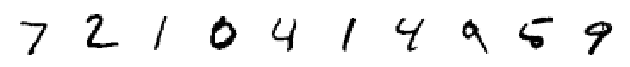

In [9]:
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


x_train, y_train, x_test, y_test = Train.load_mnist()

input_shape = 784
hidden_shape = [512, 512]
output_shape = 10
x_test = x_test.reshape((x_test.shape[0], -1))
y_test = to_categorical(y_test, num_classes=output_shape)


for idx, i in enumerate([i for i in range(10)]):
    plt.subplot(1, 10, idx + 1)  
    first_image = x_test[i]

    first_image = first_image.reshape((28, 28))
    plt.imshow(first_image, cmap='Greys', interpolation='None')
    plt.axis('off')

plt.tight_layout() 
plt.show() 

To simplify that, we have Train.load_mnist() function. It will split data to Train set and Test set, normalize it and make the label categorical. 

Now, we can start creating MNIST models.
In this model, we have three layers: input, hidden layer and output layer. Both input and hidden layers with 'relu' activation function, and the output layer with 'softmax' activation.

In [10]:
nn = Train.CreateModel(input_size=input_shape, output_size=output_shape, hidden_size=hidden_shape, noise=0.01)

In order to update the weight between the lines, we need a method to teach the model. It is called **forward and backward propagation**.


### Forward Propagation

Forward propagation is the process by which a neural network makes predictions. It involves passing input data through the network's layers, computing the output at each layer, and ultimately producing a final prediction. 


1. The process begins with the input data being fed into the input layer. Each input feature corresponds to a neuron in the input layer.
2. In each neuron of the hidden and output layers, a weighted sum of the inputs is calculated. This is done using the formula: 
    $z=\sum_{i}( x_{i},w_{i}) +b\\$
   where $w_i$ are the weights, $x_i$ are the input values, and $b$ is the bias term.

3. The weighted sum $z$ is then passed through an activation function to introduce non-linearity into the model. 
$a = \varphi(z)$, where $\varphi$ is the activation function. 
The activated output $a$ from the current layer serves as the input to the next layer. This process is repeated for all hidden layers.

##### implement forward propagation.

In [11]:
def forward(self, x: np.ndarray) -> np.ndarray:
    pass

### Backpropagation

Backpropagation is an algorithm used for training neural networks. It involves adjusting the weights and biases of the network in order to minimize the difference between the predicted output and the actual output (the error). 
This process is the counterpart to forward propagation and works by propagating the error backward through the network.


#### **Steps of Backpropagation:**
1. **Forward Propagation**:
    - Performs forward propagation to compute the predicted output of the network for the given input data.
    - Calculate the loss using the loss function.
2. **Backward Propagation**:
    Compute the gradient of the loss function with respect to the output of each neuron, layer by layer, starting from the output layer and moving backward to the input layer.
3. **Gradient Calculation**:
    - Hidden Layers: 
      For each hidden layer, compute the gradient of the loss with respect to the inputs to that layer, using the chain rule to propagate the error backward.
          $\delta^{l}=\left(\frac{\partial Loss}{\partial a^{l}}\right)\cdot\left(\frac{\partial a^{l}}{\partial z^{l}}\right)$
              where $\delta^l$ is the error term for layer $l$, $a^l$ is the activation, and $z^l$ is the pre-activation value.
    - Output Layer: 
      Compute the gradient of the loss with respect to the output layer's inputs (pre-activation values). This involves differentiating the loss function. $\delta=\frac{\partial Loss}{\partial z}$
4. **Update the weights and biases using the computed gradients.**
    This is typically done using an optimization algorithm like Gradient Descent.
    $ \[
     w_{ij}^{l} = w_{ij}^{l} - \eta \cdot \frac{\partial \text{Loss}}{\partial w_{ij}^{l}}
     \]
     \[
     b_j^{l} = b_j^{l} - \eta \cdot \frac{\partial \text{Loss}}{\partial b_j^{l}}
     \]$
     where $\( \eta \)$ is the learning rate, $\( w_{ij}^{l} \)$ is the weight connecting neuron $\( i \)$ in layer $\( l-1 \)$ to neuron $\( j \)$ in layer $\( l \)$, and $\( b_j^{l} \)$ is the bias of neuron $\( j \)$ in layer $\( l \)$.


Here's a code snip from 'Train'.

In [12]:
def backward(self, d_values: np.ndarray, learning_rate: float, t: int):
    """
    Backpropagation.
    This function will derivative the activation function, and then calculate the
    derivative once with respect to the bias and oe with respect to the weight.
    Those values might be very small, so we will clip them to keep numerical stability.
    """
    # step 1: Compute the Gradient of the Activation Function
    d_values = self.derivative_activation_function(d_values)
    
    # step 2: Compute Gradients for Weights and Biases
    d_weights = self.x.T @ d_values
    d_biases = np.sum(d_values, axis=0, keepdims=True)


    # step 3: Calculate the gradient with respect to the input
    d_inputs = d_values @ self.weights.T

    # Step 4: Update the weights and biases using the learning rate
    self.weights -= learning_rate * d_weights
    self.biases -= learning_rate * d_biases

    # Update weights & biases using m and v values
    self._update_parameters({'param': self.weights, 'm': self.m_weights, 'v': self.v_weights}, d_weights, t,
                            learning_rate)
    self._update_parameters({'param': self.biases, 'm': self.m_biases, 'v': self.v_biases}, d_biases, t,
                            learning_rate)
    return d_inputs

Now, let's build a model.

In [13]:
x_train, y_train, x_test, y_test = Train.load_mnist()
input_shape = 784
hidden_shape = [512, 512]
output_shape = 10

In [14]:
nn = Train.CreateModel(input_size=input_shape, output_size=output_shape, hidden_size=hidden_shape, noise=0.01)

Now, let's see how the number of epochs impact the prediction.

In [15]:
# model_guesses = nn.get_prediction(samples=x_test)

def plot_pred(predictions):
    for idx, i in enumerate([i for i in range(10)]):
    # for idx, i in enumerate([0, 5, 10, 15, 20, 25]):
        plt.subplot(1, 10, idx + 1) 
        first_image_guess = predictions[i]
        first_image = x_test[i]
    
        # Reshaping the image to its original dimensions
        first_image = first_image.reshape((28, 28))
        plt.imshow(first_image, cmap='Greys', interpolation='None')
        plt.title(f"Prediction: \n{np.argmax(first_image_guess)}")  # Set subplot title
        plt.axis('off') 
    
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show() 

every time you will run the box below, it do more 10 more epochs. 

Epoch 0 - Loss: 0.24184800277641558 - Accuracy: 0.1279


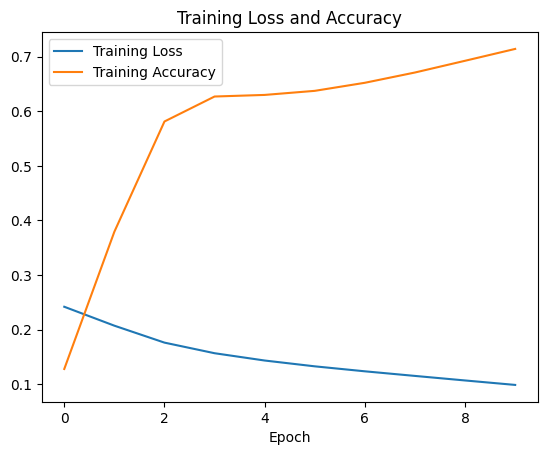

In [16]:
nn.train(x_train, y_train, initial_learning_rate=0.001, decay=0.001, n_epochs=10, plot_training_results=True)

In [17]:
# guesses = nn.get_prediction(samples=x_test)
# print("Test Loss:", nn.test_loss(x_test, y_test))
# print("Test Accuracy:", nn.test_accuracy(x_test, y_test))
plot_pred(nn.get_prediction(samples=x_test))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 784 is different from 28)